# Everything is an object, everything has a class

Everything that can be defined in Python comes from a class. There are classes of numbers, including `int` and `float`; there is a `function` class. In addition to studying functions, we'll also examine two important built-in classes: the `list` and `dict` classes. 

Below is an interesting example of the `int` class in Python. We use the `to_bytes` method of the `int` class to convert the largest integer that can be represented by one byte, $255 = 1111 1111 = 2^8 - 1 = FF$. 

In [1]:
a = 255
print(a.to_bytes(1, 'big'))
print(type(a))

b'\xff'
<class 'int'>


In [2]:
# this raises an exception; exceptions are also classes
try:
    fail = 256
    print(fail.to_bytes(1, 'big'))
except Exception as error:
    print('Got error: {}'.format(error))

Got error: int too big to convert


In the example above, we used the _method_ `a.to_bytes()` to convert the integer representation of 255 to the bytes representation of 255. Programming in general is a series of changes in representation. Classes have two basic components: _attributes_ and _methods_.

For now, we'll leave classes and move on to functions. 

## Functions

Functions have a unique way to be defined, via the `def` keyword

In [3]:
def so_fun(stuff):
    
    # sometimes we want to assign our return value before returning
    ret = stuff * 2
    
    return ret

print(so_fun([1, 2, 3]))

print(so_fun(64))

[1, 2, 3, 1, 2, 3]
128


### Keyword Arguments

In addition to positional arguments, like `stuff` above, one can define keyword arguments. Keyword arguments must have defaults. For example

In [4]:
def so_fun_w_kwargs(stuff, multiplier=2):
    
    # sometimes it's better to directly return the result of an operation
    return stuff * multiplier

print(so_fun_w_kwargs([1, 2, 3], multiplier=3))

# you can insert kwargs in order
print(so_fun_w_kwargs(64, 3))

print(so_fun_w_kwargs('fun, yo! '))

[1, 2, 3, 1, 2, 3, 1, 2, 3]
192
fun, yo! fun, yo! 


### Functions can return functions

In the example below we define a function that returns another function. Functions can also take functions as input. A function that takes another function as input is called a "higher-order function".

In [5]:
def multiply_scalar(factor):
    
    def return_fun(x):
        return factor * x
    
    return return_fun

print(type(multiply_scalar))
print(type(multiply_scalar(5)))
print(type(multiply_scalar(5)(2)))

<class 'function'>
<class 'function'>
<class 'int'>


# List class and list methods

Next, we'll look at the `list` class. Like other classes, it has methods and attributes. We also show how to use the `in` operator, and how strings can be thought of as lists of characters.

In [6]:
l1 = [1, 2]
l2 = [7, 8, 9]

print(len(l2))

l1.append(l2)
print(l1)

3
[1, 2, [7, 8, 9]]


In [7]:
# append isn't right! let's extend instead...

l1 = [1, 2]
l1.extend(l2)
print(l1)

[1, 2, 7, 8, 9]


In [8]:
# now let's build one more list, concatenating our new l1 to itself
list_add = l1 + l1
list_add_2 = l1 * 2

print(list_add)
print(list_add == list_add_2)

[1, 2, 7, 8, 9, 1, 2, 7, 8, 9]
True


In [9]:
print(next((idx, el) for idx, el in enumerate(list_add) if el > 8))
print(5 in list_add)
print(7 in list_add)

(4, 9)
False
True


In [10]:
# Finally, strings as lists of characters

s1 = 'wooly'
s2 = 'booly'
s3 = s1 + s2
print(s3)

woolybooly


In [11]:
s3_dash = '-'.join([s1, s2])
print(s3_dash)
s1_spl, s2_spl = s3_dash.split('-')
print(s1_spl == s1)
print(s2_spl == s2)

wooly-booly
True
True


In [12]:
s_yo = 'Toyota'

print(s_yo[2:4] == 'yo')  # can leave out indices as a quick quiz

True


## Dictionaries

Dictionaries are unordered collections of "key-value" pairs. _Unordered_ just means that they are not stored in a predictable order, unlike lists. In lists, the element that is at the front of the list is always at the front of the list. Dictionaries have no attributes "front" and "back" or index. Below are some examples.

In [29]:
d = {'yo': 1, 'whatup': 'star'}
print(type(d))
print(d)

<class 'dict'>
{'yo': 1, 'whatup': 'star'}


In [28]:
# we can add key/value pairs to the dictionary via the update method
d.update({'heyyo': 'money'})
print(d)

{'yo': 1, 'heyyo': 'money', 'whatup': 'star'}


The `dict` class provides three useful methods for building lists of the elements of the 
dictionary: `keys()`, `values()`, and `items()`, as shown below

In [30]:
print(list(d.keys()))
print(list(d.values()))
print(list(d.items()))

['yo', 'whatup']
[1, 'star']
[('yo', 1), ('whatup', 'star')]


The elements of the bottom list, for example `('yo', 1)`, are called _tuples_. They are similar to lists, except they are _immutable_, which means they cannot be changed. So unlike lists, you cannot append to, extend, or remove elements from a tuple.

### Variable-length arguments and keyword arguments

Now that we have studied lists and dictionaries, we can look at functions with a variable number of positional and keyword arguments. This is some of the strangest notation to see for beginners. I'm including it just so you have some exposure to it if you're trying to read some documentation in the future. 

In [13]:
def fun_with_var_args(*args):
    
    # args is a list
    for arg in args:
        print(arg)
        
fun_with_var_args('yo', 2, 42, ['foo', 'bar', 'baz'])

print('\nKWARGS:')

def fun_with_var_kwargs(**kwargs):
    # kwargs is a dictionary
    for idx, (key, val) in enumerate(kwargs.items()):
        print('Item index {}:'.format(idx))
        print('\tKey: {}\n\tValue: {}\n'.format(key, val))
        
fun_with_var_kwargs(yo='money', whatup='hoss')

yo
2
42
['foo', 'bar', 'baz']

KWARGS:
Item index 0:
	Key: yo
	Value: money

Item index 1:
	Key: whatup
	Value: hoss



# List and dictionary comprehensions

We can build up lists of anything. List comprehensions are a concise, memory-efficient, and fun way to build lists in Python.

In [14]:
# list of products of six from 0 to 6
products_of_six = [
    fac * 6 for fac in range(7)
]
print('Products of six: {}'.format(products_of_six))

# dictionary of factors products of six
factors_of_six = {
    fac: 6 * fac for fac in range(7)
}

print('Dictionary of factors of six: {}'.format(factors_of_six))

Products of six: [0, 6, 12, 18, 24, 30, 36]
Dictionary of factors of six: {0: 0, 1: 6, 2: 12, 3: 18, 4: 24, 5: 30, 6: 36}


In [15]:
vocab = ['yo', 'whatup', 'bro', 'diner', 'café']

# how do we build a dictionary that tells us the index given the word?

vocab_lookup = {word: idx for idx, word in enumerate(vocab)}

print(vocab_lookup)

{'bro': 2, 'yo': 0, 'café': 4, 'diner': 3, 'whatup': 1}


In [16]:
just_for_funsies = [
    multiply_scalar(fac) for fac in range(1, 7)
]

factors_of_six = {
    fac + 1: fun(6) for fac, fun in enumerate(just_for_funsies)
}

print(factors_of_six)

{1: 6, 2: 12, 3: 18, 4: 24, 5: 30, 6: 36}


# Classes

We'll put together a toy class below that has a single attribute, `N`, and a single method `print_hello()` that counts up from 1 to N and then prints 'Hello, World' with `N` exclamation points.

In [17]:
# PROMPT: How do we do this? Start with constructor, then we need to write our print_hello method

class C:
    
    def __init__(self, N=1):
        self.N = N
        
    def print_hello(self):
        for i in range(self.N):
            print(i + 1)
            
        print('Hello, World' + '!'*self.N)

In [18]:
c = C(N=10)
c.print_hello()

1
2
3
4
5
6
7
8
9
10
Hello, World!!!!!!!!!!


## `HistoryGraph`: A custom class for managing our history graph

In [19]:
%matplotlib inline
import os

from history_graph import HistoryGraph

matts_repo = 'https://github.com/mtpain/history_graph'
hg_matt = HistoryGraph(github_repo=matts_repo)

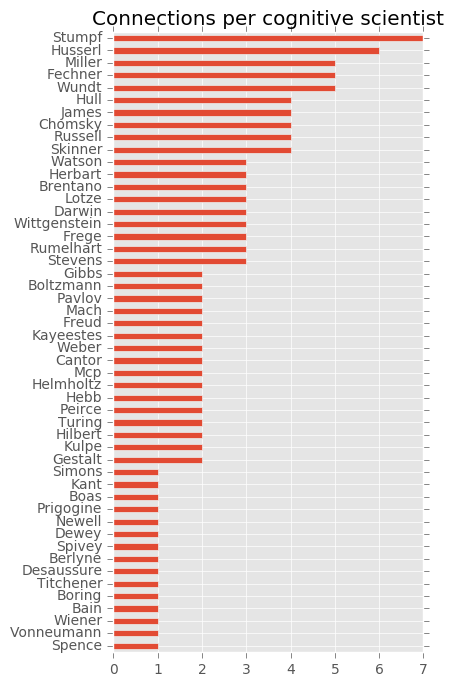

In [20]:
hg_matt.barplot_most_connected(figsize=(4, 8))

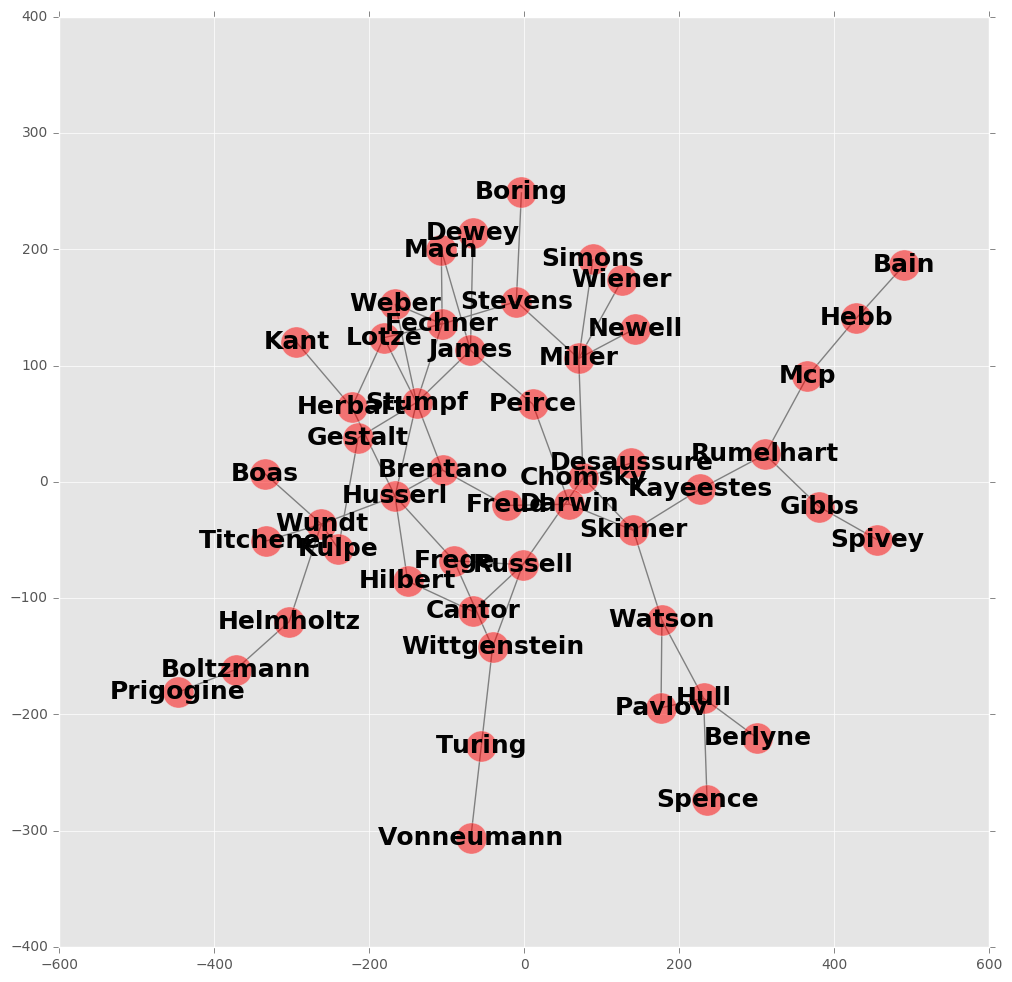

In [22]:
hg_matt.visualize(figsize=(12, 12))

In [23]:
edges = hg_matt.history_graph['edges']

edges.append({'from': 'hilbert', 'to': 'turing'})

In [24]:
hg_matt.sync_history_graph('added edge from hilbert to turing')